<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png" width="300"></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

В этом ноутбке будет рассказано об основах машинного обучения.

# 1. Основные понятия и пример

Машинное обучение -- наука о восстановлении закономерностей по частным данным. Рассмотрим на примере, что под этим имеется в виду.

<img src="https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2013/06/14/100816105-157952284.1910x1000.jpg" width=400>

Предположим, что Вы -- начинающий фермер-любитель, и занимаетесь выращиванием картофеля. Ваш огород разделён на несколько участков, и уже прошёл месяц с того момента, как Вы посадили картофель. К сожалению, в этом году особенно много колорадских жуков, а оставшегося у Вас средства от вредителей хватит только на один из этих участков. Жуки очень очень его боятся, и трогать обработанный участок не будут. Однако все остальные картофельные кусты они съедят подчистую. Поэтому Вы хотите узнать, какой из участков принёсёт Вам больше всего килограмм картофеля.

Иными словами, Вы хотите по каждому из участков научится определять, сколько картофеля он принесёт. Однако, к Вашему сожалению, Вы не имеете никакого понятия, от чего это может зависеть. Однако, к Вашему счастью, в прошлом году Вы, по какой-то причине, решили измерить площадь и число кустов картофеля на каждом из участков на соседнем огороде, а также записали, каков был урожай на каждом из них. Если бы Вы могли, **используя эти данные, восстановить закон**, по которому площадь и число кустов на участке переходит в киллограмы картофеля, то Ваш урожай был бы спасён!

## 1.1 Термины

Формулируя задачу в терминах машинного обучения, множество участков с картофелем (как наших, так и соседа) будет называться *пространством объектов*, и обозначаться через $\mathbb{X}$ (обратите внимание на шрифт). А величина, которую мы хотим научиться определять -- в данном случае, количество килограмм картофеля при сборе урожая -- *целевой переменной*. Множество значений целевой переменной -- в данном случае, это вещественные неотрицательные числа -- обозначается через $\mathbb{Y}$.

Множество объектов, для которых нам известно значение целевой переменной -- в данном случае 
это множество участков на соседнем огороде -- называются *обучающей выборкой*,  для которой используется обозначение $X = \{ x_1, \ldots, x_n\}$, где $x_i$ -- это участок $i$. Соответственно, значения целевой переменной $y_1, \ldots, y_n$ -- объёмы урожая на каждом из этих участков.

Непонятно, как можно построить формальный закон, оперируя такими неясными с математической точки зрения объектами как участок с картофелем. Поэтому каждому объекту выборки соотносят набор параметров, который этот объект описывает, который называют *вектором признаков*. В нашем примере это -- площадь участка и число кустов на нём. Обычно объект отождествляют с его вектором признаков, поэтому будем считать, что $x_i$ -- это набор признаков объекта $i$.

Цель задачи машинного обучения -- найти такую функцию $f$, переводящую вектор признаков в целевую переменную -- площадь и число кустов в число киллограммов -- что её значение будут "наиболее близко" приближать истинные значения целевой переменной. Такая функция $f$ называется *моделью*. Конечно, в идеале нам хотелось бы, чтобы $f$ всегда давала точный ответ, но такой точности почти никогда не получается добиться.  

Но что означает "наиболее близко"? Которая ошибается не больше, чем 1 киллограмм? Но таких функций может быть много. Какую из них выбрать?

Заметим, что судить о "точности" нашей модели мы можем только по обучающей выборке, так как только для неё мы знаем истинные ответы. Поэтому в машинном обучении используется подход, основанный на так называемой *функции потерь*.

Функция потерь $L(f, X, y)$ даёт нам численную оценку "точности" нашей модели на выборке $X$. То есть, формально говоря, она сопоставляет паре из модели и выборки число. Очень часто используется так называемая среднеквадратичная ошибка:
$$
    L(f, X, y) = \frac{1}{n}\sum\limits_{i=1}^{n} (f(x_i) - y_i)^2
$$

Весьма логично было бы взять такую функцию $f$, для которой значение функции потерь было бы минимальным. Но тут нас встречает ещё она проблема. В принципе, никто не мешает нам взять такую функцию $f$, что её значение на векторах из обучающей выборки будут в точности равны целевой переменной, а на всех остальных -- $0$. Однако пользы от такой модели никакой, поскольку когда мы попытаемся предсказать с её помощью значение $y$ на новых данных, мы получим $0$.

Поэтому множество всех возможных моделей ограничивают каким-то семейством (множеством) $\mathcal{A}$, в котором потом и ищут наилучшую модель.

Таким образом, в общей форме задача машинного обучения звучит так: найти такую функцию $f$ из $\mathcal{A}$, что значение функции потерь $L$ на выборке $X, y$ было бы минимальным, или
$$
    f* = \arg \min_{f \in \mathcal{A}} L(f, X, y)
$$
Задачи такого рода называются задачами оптимизации, или минимизации.

Обычно семейство $\mathcal{A}$ можно параметризовать, то есть поставить в соответствие каждой модели из $\mathcal{A}$ какое-то число или вектор из чисел $w$. Тогда соответствующая задача оптимизации будет выглядеть следующим образом:
$$
    w* = \arg \min_{w \in \mathbb{W}} L(f_w, X, y)
$$

## 1.2 Пример

Разберём это на нашем примере. В нашем примере вектор признаков -- это пара из площади и числа кустов, которые обозначим за $s_i$ и $k_i$. В качестве функции потерь будем рассматривать среднеквадратичную ошибку. Наконец, в качестве множества $\mathcal{A}$ будем использовать *линейные модели*, то есть функции вида:
$$
    f(s, k) = a + bs + ck
$$
где $a, b, c$ -- произвольные вещественные числа.

Заметим, что на таком множестве можно ввести очень естественную параметризацию, а именно $w \in \mathbb{R}^3$:
$$
    f_w(s, k) = w_0 + w_1s + w_2k
$$
Отметим, что зачастую параметр $w$ записывают как аргумент для функции $f$:
$$
    f(w, s, k) = w_0 + w_1s + w_2k
$$
Пожалуйста, будте внимательны и не путайте параметры и аргументы функции.

Теперь запишем это в виде задачи оптимизации:
$$
    w* = \arg \min_{w \in \mathbb{R}^3} L(f_w, X, y) = 
    \arg \min_{w \in \mathbb{R}^3}  \frac{1}{n} \sum\limits_{i=1}^{n}(f_w(x_i) - y_i)^2 =
    \arg \min_{w \in \mathbb{R}^3}  \frac{1}{n} \sum\limits_{i=1}^{n}(w_0 + w_1s + w_2k - y_i)^2
$$

### 1.2.1 А как найти минимум?

В самом деле, всё что нас отделяет от успеха -- это, собственно, поиск минимума. К сожалению, в общем случае выписать явную формулу не удаётся, и приходится использовать приближённые методы -- такие, как градиентный спуск. Вообще, методы оптимизации -- это отдельная большая наука. Но, тем не менее, если достаточно сильно упростить задачу, решить её сможет любой школьник.

###  1.2.2 Очень простой пример

Упростим постановку задачи, упростив множество $\mathcal{A}$. В принципе, никто не запрещает нам игнорировать один из наших признаков -- скажем, число кустов. Также избавимся от свободного члена $w_0$. Тогда наша функция приобретёт вид
$$
f_w(s) = ws, w \in \mathbb{R}
$$
Подставим это в функцию потерь.
$$
L(w, X) = \frac{1}{n} \sum\limits_{i=1}^{n} (ws_i - y_i)^2
$$
Раскроем скобки
$$
L(w, X) = \frac{1}{n} \sum\limits_{i=1}^{n} (s_i^2 w^2 - 2 y_i s_i w + y_i^2)
$$
Перегруппируем слагаемые
$$
L(w, X) = \frac{1}{n}( \sum\limits_{i=1}^{n} (s_i^2) w^2 - \sum\limits_{i=1}^{n}(2 y_i s_i) w + \sum\limits_{i=1}^{n} (y_i^2))
$$
Теперь обозначим $a = \frac{1}{n} \sum\limits_{i=1}^{n} (s_i^2) $, $b = -\frac{1}{n} \sum\limits_{i=1}^{n}(2 y_i s_i)$, $c = \frac{1}{n} \sum\limits_{i=1}^{n} (y_i^2)$. Таким образом
$$
L(w, X) = aw^2 + bw + c
$$
Как мы видим, мы получили обычный квадратный трёхчлен от $w$. Как всем известно, если $a > 0$ (что, как можно видеть, в данном случае выполняется), то его минимум достигается в точке 
$$
w^* = \frac{-b}{2a} = \frac{\frac{1}{n} \sum\limits_{i=1}^{n}2 y_i s_i}{\frac{2}{n} \sum\limits_{i=1}^{n} s_i^2} = 
\frac{\sum\limits_{i=1}^{n}y_i s_i}{\sum\limits_{i=1}^{n} s_i^2} 
$$

К сожалению, очевидно, что сколь-нибудь нетривиальную зависимость выразить таким способов не выдет, однако даже это хороший пример того, как нужно менять параметры модели, чтобы она предсказывала оптимально (с точки зрения выбранной функции потерь). 

То есть суть ***обучения*** состоит в том, чтобы **изменить параметры** модели из выбранного семейства таким образом, чтобы она предсказывала **оптимально** с точки зрения **выбранной функции потерь**, для этого используется определённый  **алгоритм оптимизации**.

# 2. Заключение

Рассмотренная нами задача относится к *задаче регрессии* -- то есть её целевая переменная принимает значения в $\mathbb{R}$. Кроме неё существует множество других задач, например задача классификации.

Кроме того, эта задача является примером задачи *обучения с учителем* -- то есть, нам даны обучающие примеры с известными значениями целевой переменной. Задачи, в которых целевые переменные неизвестны, относятся к задачам *обучения без учителя*.

Мир машинного обучения черезвычайно разнообразен, поэтому в нашем курсе мы сможем познакомить вас лишь с его небольшой частью, перед тем, как углубиться в нейронные сети.

# 3. Полезные ссылки

1. [Больше о разных направлениях машинного обучения](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5)
2. Лекции Евгения Соколова https://github.com/esokolov/ml-course-msu/tree/master/ML15/lecture-notes

# 4. Практическое занятие

# Данные

Данные - информация о приложениях из AppStore. Поставим регрессионную задачу - предсказать рейтинг приложения. 

Скачать данные: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

# Анализ данных

Начнем с самой важной части - посмотрим на данные. 

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# Загрузим данные и посмотрим на небольшую часть
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Выделим фичи из датасета и поделим их на числовые и категориальные. 

In [0]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    # Эта фича - не числовая, а порядковая, но мы все равно возьмем ее как числовую для удобства
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [0]:
data = data[cols]
# Возраст записан не в виде числа, исправим это, вырезав последний символ и скастовав к числу
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5


In [0]:
# Посмотрим на пропущенные значения
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [0]:
# Посмотрим на распределение категориальных фичей
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [0]:
# Как мы видим, в колонке currency только одно значение, можно колонку убрать
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

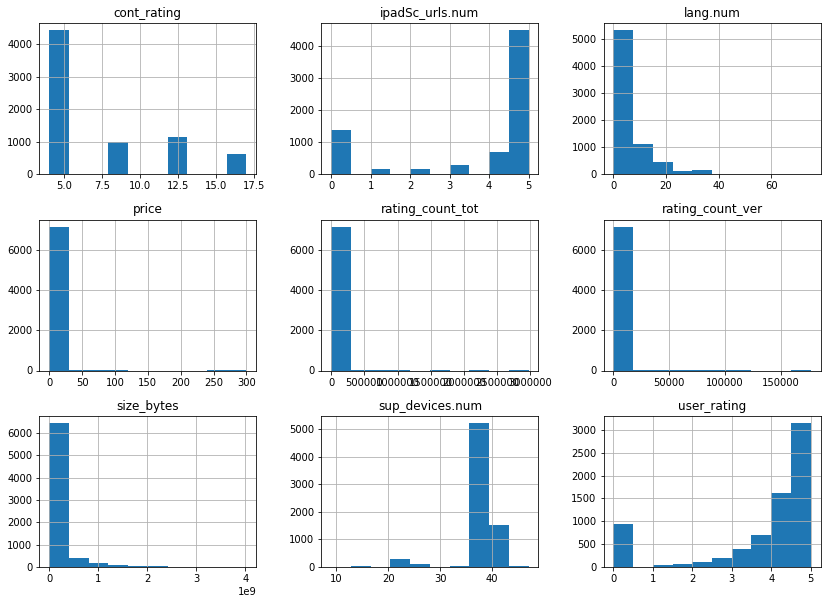

In [0]:
# Посмотрим на распредление величин
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

А теперь посмотрим на корреляции между фичами

In [0]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating
size_bytes,1,0.18,0.0045,0.0063,-0.12,0.15,0.0046,0.14,0.066
price,0.18,1,-0.039,-0.018,-0.12,0.066,-0.0067,-0.03,0.047
rating_count_tot,0.0045,-0.039,1,0.16,0.0088,0.016,0.14,0.0091,0.083
rating_count_ver,0.0063,-0.018,0.16,1,0.038,0.024,0.013,0.0014,0.069
sup_devices.num,-0.12,-0.12,0.0088,0.038,1,-0.038,-0.042,0.02,-0.042
ipadSc_urls.num,0.15,0.066,0.016,0.024,-0.038,1,0.088,-0.11,0.27
lang.num,0.0046,-0.0067,0.14,0.013,-0.042,0.088,1,-0.07,0.17
cont_rating,0.14,-0.03,0.0091,0.0014,0.02,-0.11,-0.07,1,-0.098
user_rating,0.066,0.047,0.083,0.069,-0.042,0.27,0.17,-0.098,1


И двойные графики

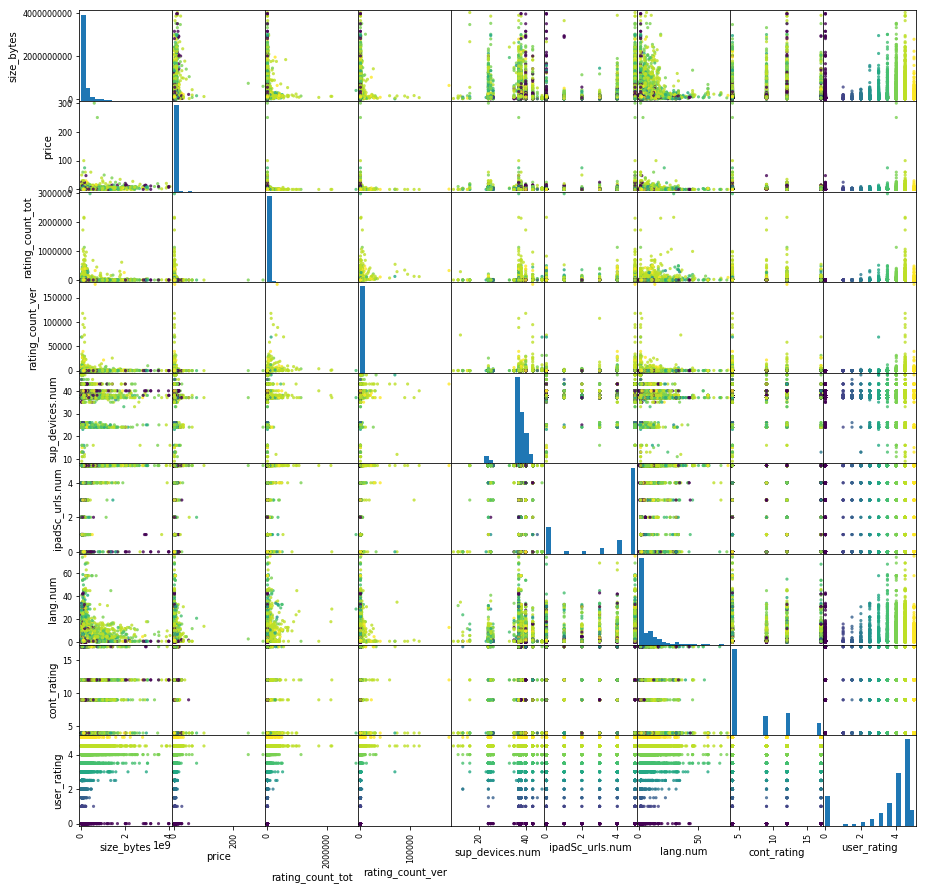

In [0]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

**Упражнение**: Мы только что посмотрели на данные, какой из посмотренных графиков говорит, что мы вряд ли сможем сделать хорошую модель?
> Ответ:

В данном случае фичей мало, поэтому мы легко смогли посмотреть на них. Обычно фичей намного больше и построить такие графики для пар фичей не получится. Тогда в первую очередь можно посмотреть на корреляцию фичей с таргетом.

# Подготовка данных

### Очистка

Данные достаточно чистые, в них вряд ли есть какие-то ошибки и не получается с первого взгляда найти выбросы (outliers). Поэтому и очищать особо нечего. Но в реальной жизни, ваши данные скорее всего будут полны мусора.

Чаще всего нам пришлось бы убирать выбросы, исправлять очевидные ошибки итд.


### Создание фичей

Чем сложнее зависимость между фичей и таргетом, тем более сложная модель потребуется, чтобы эту зависимость использовать. Почему бы просто не выбрать семейство самых гибких моделей? Проблема в том, что без большого количества данных для обучения будет происходить overfit. Это значит, что модель выучит зависимости, которые случайно появились в обучающих из-за ограниченного размера выборки. Такая модель будет хорошо работать на обучающей выборке, но будет плохо справляться с реальной задачей.

Используя человеческие знания об устройстве мира, мы можем упростить такую зависимость, создав новые фичи. На самом деле, можно даже не использовать человеческие знания, а просто применить какой-нибудь алгоритм. Например, если у нас есть фичи $x_1, x_2, ..., x_n$, то мы можем добавить новые фичи вида 
$$x_{newij} = x_i x_j, i \ne j$$
и понадеяться, что это улучшит предсказания

In [0]:
# Добавим категориальную фичу, которая говорит, бесплатное приложение или нет
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating,is_free
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0,False
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0,True
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5,True
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0,True
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5,True


### Работа с категориальными фичами

Большинство алгоритмов не принимает категориальные фичи в чистом виде и нужно из как-то закодировать.

Из популярных алгоритмов с категориальными фичами умеет работать Градиентный Бустинг. У этого алгоритма есть много реализаций и среди известных мне реализаций с категориальными фичами в виде строк/булевых значений/etc умеет работать только catboost (библиотека от Яндекса, реализующая градиентный бустинг). Для xgboost и lightgbm же категориальные фичи нужно превратить в числа. Градиентный бустинг в sklearn вообще не умеет по-особенному обрабатывать категориальные фичи и их нужно кодировать как и для других алгоритмов.

#### One-hot-encoding
Самый простой способ закодировать категориальные фичи - one hot encoding. Представьте, что у нас есть категориальная фича prime_genre с возможными значениями 
> ['Games', 'Entertainment', 'Education', 'Photo & Video']

мы можем создать 4 новые бинарные фичи для каждого из столбцов

> 'Entertaiment' -> [0, 1, 0, 0]

В pandas очень удобно использовать get_dummies для one-hot-encoding

In [0]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

,categorical
0,a
1,b
2,a
3,c


In [0]:
pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


In [0]:
# Задание: Теперь добавьте в датафрейм колонки для всех категориальных фичей и обновите список категориальных фичей


,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,prime_genre_Book,...,prime_genre_News,prime_genre_Photo & Video,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather
0,100788224,3.99,21292,26,38,5,10,4,4.0,0,...,0,0,0,0,0,0,0,0,0,0
1,158578688,0.00,161065,26,37,5,23,4,4.0,0,...,0,0,1,0,0,0,0,0,0,0
2,100524032,0.00,188583,2822,37,5,3,4,3.5,0,...,0,0,0,0,0,0,0,0,0,1
3,128512000,0.00,262241,649,37,5,9,12,4.0,0,...,0,0,0,0,1,0,0,0,0,0
4,92774400,0.00,985920,5320,37,5,45,4,4.5,0,...,0,0,0,1,0,0,0,0,0,0


In [0]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new

### Уменьшение размерности

Часто бывает ситуация, когда данные имеют слишком большую размерность, особенно после one-hot-encoding. В таком случае могут помочь алгоритмы для снижения размерности данных. Один из таких алгоритмов - PCA.

<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Principal+Component+Analysis.jpg">
Source: https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

В этом алгоритме мы находим перпендикулярные направления, вдоль которых имеется наибольшая вариация данных (на картинке можно увидеть такие векторы), выбираем из таких направлений $k$ с самой большой вариацией и в качестве новых фичей берем проекции точек на эти направления.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
pca.fit(data[num_cols + cat_cols])
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X = pca.transform(data[num_cols + cat_cols])

# Или есть более простой способ 
X = pca.fit_transform(data[num_cols + cat_cols])

# Разделение на train/test

После того, как мы обучили нашу модель нам нужно как-то понять, насколько она хорошо работает. Выше мы уже говорили про переобучение на данные, с которыми сеть обучалась. Из-за такого переобучения мы не сможем посчитать адекватно узнать точность предсказаний, если проверим точность на тех же данных, на которых обучались. Чтобы с этим бороться обучающую выборку обычно делят на две части train и test. На первой мы будем обучать модель, а на второй проверять, насколько хорошо модель работает. Размер тестовой выборки в 30-40% - неплохой выбор.

Иногда данных слишком мало, чтобы жертвовать ими на тестовую часть. Тогда применяется метод, который называет cross validation. Мы посмотрим на то, как он работает в секции про оценку модели.

**На самом деле, мы сделали не совсем правильно, потому что разделение на train/test нужно делать до добавления новых фичей/их кодирования итд. Иначе возможны лики из test части в train часть.** Например, при нормализации и PCA мы работаем со всем массивом данных, а значит информация из test попадет и в train. Но для упрощения кода и понимания того, что происходит мы не поделили выборку заранее. Если бы мы все-таки разделили выборку заранее, то нужно использовать fit на train части, а transform уже на обеих.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Задание: Загуглите как работает эта функция и поделите выборку на две части


Хорошо, теперь можно обучить модели

# Обучение

Самый хороший способ - попробовать максимум разных алгоритмов, посмотреть, какой из них лучше справляется и уже по метрикам выбрать лучший (возможно, объединить предсказания с помощью стэкинга или блендинга, о которых будет на следующем занятии).

In [0]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

Наш курс про нейронные сети, поэтому мы не будем фокусироваться на алгоритмах, которые здесь представлены. Все, что нужно знать Ridge - линейная регрессия с регуляризацией. GradientBoosting и RandmForest - алгоритмы, основанные на том, что у нас есть много решающих деревьев, результаты которых потом аггрегируются, чтобы получить финальное предсказание. Как выглядит решающее дерево:
<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/07/what-is-a-decision-tree.png">
Source: https://www.displayr.com/what-is-a-decision-tree/

Лучше поговорим про метрики. В данном случае у нас задача регрессии, поэтому мы используем две метрики MSE и R_squared. 

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y^i - y_{pred}^i)^2}{\sum_{i=1}^{n} (y^i - y_{mean})^2}$$

Другими словами, это доля объясненной вариации. Максимальное значение = 1, когда у нас есть идеальный предсказатель. Значение меньше 0 означает, что наша модель хуже, чем константая модель, которая выдает просто среднее по таргету.

In [0]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [0]:
# Используем обычную линейную регрессию, минимизирующую сумму квадратов ошибки
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -5.654233536547601
MSE: 2.0554691599533355


In [0]:
# Используем линейную регрессию с регуляризацией - в Loss добавляется сумма квадратов коэффициентов, умноженная
# на некоторый коэффициент. Это позволяет бороться с тем, что колонки в данных могут быть линейно зависимы
# А они у нас почти навреняка линейно зависимы из-за one hot encdoing
rlr = Ridge(alpha=1)
rlr.fit(X_train, y_train)

print_metrics(rlr.predict(X_test), y_test)

R^2: -5.671837645781365
MSE: 2.055147983478608


/home/runfme/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1408853848670042e-19 / 1.1102230246251565e-16
  RuntimeWarning)


In [0]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

print_metrics(gbr.predict(X_test), y_test)

R^2: 0.07351431524125152
MSE: 1.1211178591997888


In [0]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print_metrics(rfr.predict(X_test), y_test)

/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2: 0.44510323338111324
MSE: 0.8838368055555555


Как видим, методы, основанные на линейной регрессии дали результаты хуже, чем предсказание константы, а вот методы, основанные на лесах уже сработали лучше. 

**Задание:** поиграйтесь с гиперпараметрами и улучшите предсказания моделей.

# Cross Validation

До этого мы разбирали случай, когда выбоорка заранее делится на train/test, но часто данных итак не хватает и отдавать их часть на test слишком расточительно. В такой ситуации на помощью приходит кросс валидация:
1. Выберем $k$ - количество частей, на которые разобьется наш датасет
2. for $ i = 1..k$ 
    * Обучим модель на всех частях датасета, кроме i-ой.
    * Посчитаем метрики или предсказания для i-ой части
3. Саггрегируем все все предсказания или усредним метрики

Таким образом мы сможем получить более объективные предсказания нашей модели, использовав весь датасет как train и как test, при этом не создав утечек данных.

В sklearn существуют уже готовые классы моделей, которые за нас проводят все вышеописанные действия. Но у них есть один минус - выше мы уже писали, что лики могут произойти еще на этапе обработки данных. Избежать этого при ручной разбивке датасета легко, но в случае кросс валидации придется либо сдлеать специальный объект Pipeline, в котором будет скрыта вся обработка данных, и sklearn просто вызовет его $k$ раз, либо руками выбирать индексы объектов с помощью класса KFold и самостоятельно обрабатывать данные. Мы не будем делать ни то, ни другое, но покажем, как это может быть реализовано.

Получим из кроссвалидации метрики

In [0]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

In [0]:
cross_validate(LinearRegression(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00865054, 0.01165724, 0.0081768 , 0.00537443, 0.00603843]),
 'score_time': array([0.00118399, 0.0008266 , 0.00587416, 0.00417447, 0.00231886]),
 'test_r2_score': array([-0.74671063,  0.05981847,  0.116435  ,  0.09241455,  0.05581524]),
 'train_r2_score': array([0.15464708, 0.12172551, 0.12502367, 0.11391428, 0.12290107]),
 'test_mean_squared_error': array([1.58946287, 1.4977749 , 1.93887554, 2.87296906, 2.98015992]),
 'train_mean_squared_error': array([2.20845892, 2.1548725 , 2.03780731, 1.81660089, 1.79177977])}

In [0]:
cross_validate(Ridge(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score, ), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

/home/runfme/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.059940553246464e-20 / 1.1102230246251565e-16
  RuntimeWarning)
/home/runfme/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1969034413960065e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/home/runfme/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.3699910559012357e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/home/runfme/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned 

{'fit_time': array([0.00763559, 0.0046618 , 0.00721359, 0.0045495 , 0.00329447]),
 'score_time': array([0.00190687, 0.0015595 , 0.00301266, 0.00499272, 0.00112939]),
 'test_r2_score': array([-0.74651409,  0.05998693,  0.11657903,  0.09228454,  0.05577071]),
 'train_r2_score': array([0.15464585, 0.12172418, 0.12502229, 0.11391333, 0.12290005]),
 'test_mean_squared_error': array([1.58928402, 1.49750652, 1.9385595 , 2.87338059, 2.98030046]),
 'train_mean_squared_error': array([2.20846212, 2.15487577, 2.0378105 , 1.81660284, 1.79178185])}

In [0]:
cross_validate(GradientBoostingRegressor(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score, ), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_r2_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([1.09012842, 1.13862205, 1.05718803, 1.05808377, 1.05288243]),
 'score_time': array([0.00554633, 0.00721025, 0.00600219, 0.00577211, 0.00591898]),
 'test_r2_score': array([0.26276641, 0.45273481, 0.5239063 , 0.57130419, 0.52194917]),
 'train_r2_score': array([0.62517112, 0.61957436, 0.61995394, 0.60260442, 0.61097062]),
 'test_mean_squared_error': array([0.67086408, 0.8718317 , 1.04472952, 1.35704003, 1.50888678]),
 'train_mean_squared_error': array([0.9792291 , 0.93338558, 0.88512181, 0.81471708, 0.79472788])}

In [0]:
cross_validate(RandomForestRegressor(), X, data[target_col], cv=5, 
               scoring={'r2_score': make_scorer(r2_score, ), 
                        'mean_squared_error': make_scorer(mean_squared_error)})

/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/runfme/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/runfme/anaconda3/lib/python3.6/site-pa

{'fit_time': array([0.91328096, 0.939852  , 0.98553514, 0.92395091, 0.9721694 ]),
 'score_time': array([0.00663829, 0.01453352, 0.0079906 , 0.00931716, 0.00813794]),
 'test_r2_score': array([0.34185076, 0.55803689, 0.62082964, 0.63872558, 0.6017656 ]),
 'train_r2_score': array([0.93519958, 0.93280163, 0.93216743, 0.92056393, 0.92786276]),
 'test_mean_squared_error': array([0.59889931, 0.70407812, 0.83204309, 1.1436171 , 1.25695969]),
 'train_mean_squared_error': array([0.16928913, 0.1648732 , 0.15798107, 0.16285516, 0.1473654 ])}

А еще с помощью кросс валидации можно искать гиперпараметры.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
gbr_grid_search = GridSearchCV(GradientBoostingRegressor(), 
                               [{'n_estimators': [100, 150, 440], 'learning_rate': [0.01, 0.05, 0.1, 0.15]}],
                               cv=5,
                               error_score=make_scorer(mean_squared_error),
                               verbose=10)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=100, score=0.37883609804704665, total=   0.9s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.39763641999920696, total=   0.9s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.389514786756172, total=   0.8s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.3869736255374442, total=   0.9s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.3708425652585827, total=   0.9s
[CV] learning_rate=0.01, n_estimators=150 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=150, score=0.43773778283404535, total=   1.3s
[CV] learning_rate=0.01, n_estimators=150 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.7s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=150, score=0.4506492317589179, total=   1.2s
[CV] learning_rate=0.01, n_estimators=150 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.9s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=150, score=0.4368472593646916, total=   1.3s
[CV] learning_rate=0.01, n_estimators=150 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.2s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=150, score=0.43902280432526497, total=   1.3s
[CV] learning_rate=0.01, n_estimators=150 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.5s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=150, score=0.4190758896629332, total=   1.3s
[CV] learning_rate=0.01, n_estimators=440 ............................
[CV]  learning_rate=0.01, n_estimators=440, score=0.5278818213453005, total=   3.5s
[CV] learning_rate=0.01, n_estimators=440 ............................
[CV]  learning_rate=0.01, n_estimators=440, score=0.5386875286080133, total=   3.6s
[CV] learning_rate=0.01, n_estimators=440 ............................
[CV]  learning_rate=0.01, n_estimators=440, score=0.5128319892751245, total=   3.5s
[CV] learning_rate=0.01, n_estimators=440 ............................
[CV]  learning_rate=0.01, n_estimators=440, score=0.5203819892447039, total=   3.6s
[CV] learning_rate=0.01, n_estimators=440 ............................
[CV]  learning_rate=0.01, n_estimators=440, score=0.4835299794435976, total=   3.5s
[CV] learning_rate=0.05, n_estimators=100 ............................
[CV]  learning_rate=0.05, n_estimators=100, score=0.5307481972173247, 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=make_scorer(mean_squared_error),
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [100, 150, 440], 'learning_rate': [0.01, 0.05, 0.1, 0.15]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [0]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'learning_rate': 0.15, 'n_estimators': 440}
0.5468508972094398
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=440, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


**Задание**: попробуйте поиск гиперпараметров для RandomForest, разберитесь как работает KFold по документации sklearn.

In [0]:
from sklearn.model_selection import KFold

In [0]:
kf = KFold(n_splits=5)

In [0]:
model = GradientBoostingRegressor()

In [0]:
metrics = []
for train_ind, test_ind in kf.split(X_train):
    model.fit(X_train[train_ind], y_train.values[train_ind])
    pred = model.predict(X_train[test_ind])
    metrics.append(mean_squared_error(y_train.values[test_ind], pred))

In [0]:
metrics

[1.177549944614926,
 0.9881795543136506,
 1.075108741504193,
 1.0888426636638686,
 1.1526699325381964]